In [103]:
from scipy.io import netcdf, loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
sys.path.append('/noc/users/am8e13/Python/python_functions/')
from barotropic import *
from topostrophy import *
from readfiles import *
#from Variable_button import *

In [104]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth=file2read.variables['Depth']
Depth=Depth[:]*1
Zp1 = file2read.variables['Zp1']
Zp1 = Zp1[:]*1
bathy=file2read.variables['HFacC']
bathy=bathy[:]*1
bathy[bathy==0]=-1
bathy[bathy>0]=0
bathy[bathy==-1]=1

bathy1 = bathy[0,:,:]

In [105]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results18km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth18km=file2read.variables['Depth']
Depth18km=Depth18km[:]*1
Zp118km = file2read.variables['Zp1']
Zp118km = Zp118km[:]*1
bathy18km=file2read.variables['HFacC']
bathy18km=bathy18km[:]*1
bathy18km[bathy18km==0]=-1
bathy18km[bathy18km>0]=0
bathy18km[bathy18km==-1]=1

bathy118km = bathy18km[0,:,:]

In [106]:
def monitor_extract(x,iter_list):
    os.chdir(x)
    theta_mean_tot =[]
    theta_max_tot =[]
    theta_min_tot =[]
    eta_mean_tot =[]
    eta_max_tot =[]
    eta_min_tot =[]
    salt_mean_tot =[]
    salt_max_tot =[]
    salt_min_tot =[]
    sss_mean_tot =[]
    sss_max_tot =[]
    sss_min_tot =[]
    sst_mean_tot =[]
    sst_max_tot =[]
    sst_min_tot =[]
    vvel_mean_tot =[]
    vvel_max_tot =[]
    vvel_min_tot =[]
    uvel_mean_tot =[]
    uvel_max_tot =[]
    uvel_min_tot =[]
    ke_mean_tot =[]
    ke_max_tot =[]
    ke_vol_tot =[]
    seaice_area_max_tot = []
    seaice_area_min_tot = []
    seaice_area_mean_tot = []
    seaice_heff_max_tot = []
    seaice_heff_min_tot = []
    seaice_heff_mean_tot = []
    time_seconds_tot = []
    
    
    for iter in iter_list:
        zerosto_add = '0'
        for zeros in range(9 - len(str(iter))):
            zerosto_add = '0'+zerosto_add
        
        file2read = netcdf.NetCDFFile("monitor."+zerosto_add+str(iter)+".t001.nc",'r')
        file2read3 = netcdf.NetCDFFile("monitor_seaice."+zerosto_add+str(iter)+".t001.nc",'r')

        
        time_seconds = file2read.variables['time_secondsf']
        time_seconds=time_seconds[:]*1    
        theta_mean=file2read.variables['dynstat_theta_mean']
        theta_mean=theta_mean[:]*1    
        theta_max=file2read.variables['dynstat_theta_max']
        theta_max=theta_max[:]*1
        theta_min=file2read.variables['dynstat_theta_min']
        theta_min=theta_min[:]*1    
        salt_mean=file2read.variables['dynstat_salt_mean']
        salt_mean=salt_mean[:]*1
        salt_max=file2read.variables['dynstat_salt_max']
        salt_max=salt_max[:]*1
        salt_min=file2read.variables['dynstat_salt_min']
        salt_min=salt_min[:]*1    
        sst_mean=file2read.variables['dynstat_sst_mean']
        sst_mean=sst_mean[:]*1
        sst_max=file2read.variables['dynstat_sst_max']
        sst_max=sst_max[:]*1
        sst_min=file2read.variables['dynstat_sst_max']
        sst_min=sst_min[:]*1    
        sss_mean=file2read.variables['dynstat_sss_mean']
        sss_mean=sss_mean[:]*1
        sss_mim=file2read.variables['dynstat_sss_min']
        sss_min=sss_mean[:]*1
        sss_max=file2read.variables['dynstat_sss_max']
        sss_max=sss_max[:]*1    
        eta_mean=file2read.variables['dynstat_eta_mean']
        eta_mean=eta_mean[:]*1
        eta_min=file2read.variables['dynstat_eta_min']
        eta_min=eta_min[:]*1
        eta_max=file2read.variables['dynstat_eta_max']
        eta_max=eta_max[:]*1    
        uvel_mean=file2read.variables['dynstat_uvel_mean']
        uvel_mean=uvel_mean[:]*1
        uvel_max=file2read.variables['dynstat_uvel_max']
        uvel_max=uvel_max[:]*1
        uvel_min=file2read.variables['dynstat_uvel_min']
        uvel_min=uvel_min[:]*1    
        vvel_mean=file2read.variables['dynstat_vvel_mean']
        vvel_mean=vvel_mean[:]*1
        vvel_max=file2read.variables['dynstat_vvel_max']
        vvel_max=vvel_max[:]*1
        vvel_min=file2read.variables['dynstat_vvel_min']
        vvel_min=vvel_min[:]*1    
        ke_mean=file2read.variables['ke_mean']
        ke_mean=ke_mean[:]*1
        ke_max=file2read.variables['ke_max']
        ke_max=ke_max[:]*1
        ke_vol=file2read.variables['ke_vol']
        ke_vol=ke_vol[:]*1    
        seaice_area_max = file2read3.variables['seaice_area_max']
        seaice_area_max = seaice_area_max[:]*1
        seaice_area_min = file2read3.variables['seaice_area_min']
        seaice_area_min = seaice_area_min[:]*1
        seaice_area_mean = file2read3.variables['seaice_area_mean']
        seaice_area_mean = seaice_area_mean[:]*1
        seaice_heff_max = file2read3.variables['seaice_heff_max']
        seaice_heff_max = seaice_heff_max[:]*1
        seaice_heff_min = file2read3.variables['seaice_heff_min']
        seaice_heff_min = seaice_heff_min[:]*1
        seaice_heff_mean = file2read3.variables['seaice_heff_mean']
        seaice_heff_mean = seaice_heff_mean[:]*1
    
        seaice_area_max_tot =np.concatenate([seaice_area_max_tot , seaice_area_max])
        seaice_area_min_tot = np.concatenate([seaice_area_min_tot , seaice_area_min])
        seaice_area_mean_tot =np.concatenate([seaice_area_mean_tot , seaice_area_mean])    
        seaice_heff_max_tot =np.concatenate([seaice_heff_max_tot , seaice_heff_max])
        seaice_heff_min_tot = np.concatenate([seaice_heff_min_tot , seaice_heff_min])
        seaice_heff_mean_tot =np.concatenate([seaice_heff_mean_tot , seaice_heff_mean])        
        time_seconds_tot =np.concatenate([time_seconds_tot , time_seconds])
        theta_mean_tot =np.concatenate([theta_mean_tot , theta_mean])
        theta_min_tot = np.concatenate([theta_min_tot , theta_min])
        theta_max_tot =np.concatenate([theta_max_tot , theta_max])    
        salt_mean_tot =np.concatenate([salt_mean_tot , salt_mean])
        salt_min_tot =np.concatenate([salt_min_tot , salt_min])
        salt_max_tot =np.concatenate([salt_max_tot , salt_max])
        sst_mean_tot =np.concatenate([sst_mean_tot , sst_mean])
        sst_min_tot =np.concatenate([sst_min_tot , sst_min])
        sst_max_tot =np.concatenate([sst_max_tot , sst_max])    
        sss_mean_tot =np.concatenate([sss_mean_tot , sss_mean])
        sss_min_tot =np.concatenate([sss_min_tot , sss_min])
        sss_max_tot =np.concatenate([sss_max_tot , sss_max])    
        vvel_mean_tot =np.concatenate([vvel_mean_tot , vvel_mean])
        vvel_min_tot =np.concatenate([vvel_min_tot , vvel_min])
        vvel_max_tot =np.concatenate([vvel_max_tot , vvel_max])    
        uvel_mean_tot =np.concatenate([uvel_mean_tot , uvel_mean])
        uvel_min_tot =np.concatenate([uvel_min_tot , uvel_min])
        uvel_max_tot =np.concatenate([uvel_max_tot , uvel_max])
        eta_mean_tot =np.concatenate([eta_mean_tot , eta_mean])
        eta_min_tot = np.concatenate([eta_min_tot , eta_min])
        eta_max_tot =np.concatenate([eta_max_tot , eta_max])
        ke_mean_tot =np.concatenate([ke_mean_tot , ke_mean])
        ke_vol_tot = np.concatenate([ke_vol_tot , ke_vol])
        ke_max_tot =np.concatenate([ke_max_tot , ke_max])
    
    #averages
    ave_theta_mean = np.zeros(32)
    ave_sss_mean = np.zeros(32)
    ave_sst_mean = np.zeros(32)
    for i in range(32):
        ave_theta_mean[i] = np.mean(theta_mean_tot[i*36+0:i*36+36])
        ave_sss_mean[i] = np.mean(sss_mean_tot[i*36+0:i*36+36])
        ave_sst_mean[i] = np.mean(sst_mean_tot[i*36+0:i*36+36])
        
    return     theta_mean_tot, theta_max_tot, theta_min_tot, eta_mean_tot, eta_max_tot, eta_min_tot, \
                salt_mean_tot, salt_max_tot, salt_min_tot, sss_mean_tot, sss_max_tot, sss_min_tot, \
                sst_mean_tot, sst_max_tot, sst_min_tot, vvel_mean_tot, vvel_max_tot, vvel_min_tot, \
                uvel_mean_tot, uvel_max_tot, uvel_min_tot, ke_mean_tot, ke_max_tot, ke_vol_tot, \
                seaice_area_max_tot, seaice_area_min_tot, seaice_area_mean_tot, seaice_heff_max_tot, \
                seaice_heff_min_tot, seaice_heff_mean_tot, time_seconds_tot

In [183]:
class MonitorRead:    
    def __init__(self):
        self.data = {'theta_mean' : [], 'theta_min' : [], 'theta_max' : [] , 'eta_mean' : [], 'eta_max' : [], \
                     'eta_min' : [], 'salt_mean' : [] , 'salt_max' : [] , 'salt_min' : [] , 'sss_mean': [] , \
                     'sss_max' : [], 'sss_min' : [], 'sst_mean' : [], 'sst_max' : [], 'sst_min' : [], \
                     'vvel_mean' : [], 'vvel_max' : [], 'vvel_min' : [], 'uvel_mean' : [], 'uvel_max' : [], \
                     'uvel_min' : [], 'ke_mean' : [], 'ke_max' : [], 'ke_vol' : [], 'seaice_area_max' : [], \
                     'seaice_area_min' : [], 'seaice_area_mean' : [], 'seaice_heff_max' : [], 'seaice_heff_min' : [], \
                     'seaice_heff_mean' : [], 'time_seconds' : [] , 'time_years' : [] }
        
    def readData(self,path,iters):
        self.data['theta_mean'], self.data['theta_max'], self.data['theta_min'], self.data['eta_mean'],\
        self.data['eta_max'], self.data['eta_min'], self.data['salt_mean'], self.data['salt_max'],\
        self.data['salt_min'], self.data['sss_mean'], self.data['sss_max'], self.data['sss_min'],\
        self.data['sst_mean'], self.data['sst_max'], self.data['sst_min'], self.data['vvel_mean'],\
        self.data['vvel_max'], self.data['vvel_min'], self.data['uvel_mean'], self.data['uvel_max'],\
        self.data['uvel_min'], self.data['ke_mean'], self.data['ke_max'], self.data['ke_vol'], \
        self.data['seaice_area_max'], self.data['seaice_area_min'], self.data['seaice_area_mean'], \
        self.data['seaice_heff_max'], self.data['seaice_heff_min'], self.data['seaice_heff_mean'], \
        self.data['time_seconds'] = monitor_extract(path,iters)
        self.data['time_years'] = (self.data['time_seconds']- self.data['time_seconds'][0])/(360*60*60*24)
    
    def title(self,title,color):
        self.title = title
        self.color = color

run_ERA1 = MonitorRead()        
run_ERA1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_ERA/results_120years/',[0,518400,1036800])
run_ERA1.title('ERA run','blue')

run_JRA_noobs = MonitorRead()
run_JRA_noobs.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_newdownloaded_obcs/results/',[0,518400,1036800])
run_JRA_noobs.title('JRA run with no OBS','red')

run_JRA_first =MonitorRead()
run_JRA_first.readData('/scratch/general/am8e13/results_first/',[0,262800,459900,1051200,1116900,1379700])
run_JRA_first.title('JRA run first','orange')

run_ERA_notempobs = MonitorRead()
run_ERA_notempobs.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_ERA_notemp_salt/results/',[0,518400,1036800])
run_ERA_notempobs.title('ERA run with no obs on temp','yellow')

run_ERA_noobs = MonitorRead()
run_ERA_noobs.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_ERA_noobcs/results/',[0,518400,1036800])
run_ERA_noobs.title('ERA run with no obs on temp/salt','green')

run_ERA_obsonchucky = MonitorRead()
run_ERA_obsonchucky.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_temponchucky/results/',[0,518400,1036800])
run_ERA_obsonchucky.title('ERA run with temp cond on cjkucky sea','black')

run_ERA_tempcorr0 = MonitorRead()
run_ERA_tempcorr0.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800])
run_ERA_tempcorr0.title('ERA run with OBS*0.5','grey')

run_ERA_tempcorr1 = MonitorRead()
run_ERA_tempcorr1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs1/results/',[0,518400,1036800])
run_ERA_tempcorr1.title('ERA run with OBS*0.8','cyan')
run_ERA_tempcorr2 = MonitorRead()

run_ERA_tempcorr2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs2/results/',[0,518400,1036800])
run_ERA_tempcorr2.title('ERA run with OBS*0.65','magenta')

run_JRA_tempcorr0 = MonitorRead()
run_JRA_tempcorr0.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr0/results/',[0,518400,1036800])
run_JRA_tempcorr0.title('JRA run with OBS*0.5','purple')

run_JRA_tempcorr1 = MonitorRead()
run_JRA_tempcorr1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr1/results/',[0,518400,1036800])
run_JRA_tempcorr1.title('JRA run with OBS*0.8','brown')

run_JRA_tempcorr2 = MonitorRead()
run_JRA_tempcorr2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr2/results/',[0,518400,1036800])
run_JRA_tempcorr2.title('JRA run with OBS*0.65','pink')

run_PHC = MonitorRead()
run_PHC.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_PHC/results/',[0])
run_PHC.title('PHC','violet')

run_WOA = MonitorRead()
run_WOA.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_WOA/results/',[0])
run_WOA.title('WOA','yellow')

In [108]:
titles = {'theta_mean' : 'Temperature Mean', 'theta_min' : 'Temperature Min', 'theta_max' :  'Temperature Max', \
            'eta_mean' : 'ETA mean', 'eta_max' : 'ETA max', 'eta_min' : 'ETA min', 'salt_mean' : 'Salinity Mean' , \
            'salt_max' : 'Salinity Max' , 'salt_min' : 'Salinity Min' , 'sss_mean': 'SSS mean' , \
            'sss_max' : 'SSS max', 'sss_min' : 'SSS min', 'sst_mean' : 'SST mean', 'sst_max' : 'SST max' , \
            'sst_min' : 'SST min', 'vvel_mean' : 'V mean', 'vvel_max' : 'V max' , 'vvel_min' : 'V min', \
            'uvel_mean' : 'U mean', 'uvel_max' : 'U max', 'uvel_min' : 'U min', 'ke_mean' : 'Kinetic mean', \
            'ke_max' : 'Kinetic max', 'ke_vol' : 'Kinetic volume', 'seaice_area_max' : 'Seaice area max', \
            'seaice_area_min' : 'Seaice area min', 'seaice_area_mean' : 'Seaice area mean', \
            'seaice_heff_max' : 'Seaice thickness max', 'seaice_heff_min' : 'Seaicea thickness max', \
            'seaice_heff_mean' : 'Seaice thickness mean', 'time_seconds' : 'Time seconds' , \
          'time_years' : 'Time years'} 
unity = {'theta_mean' : 'C', 'theta_min' : 'C', 'theta_max' :  'C', \
            'eta_mean' : 'm', 'eta_max' : 'm', 'eta_min' : 'm', 'salt_mean' : 'psu' , \
            'salt_max' : 'psu' , 'salt_min' : 'psu' , 'sss_mean': 'psu' , \
            'sss_max' : 'psu', 'sss_min' : 'psu', 'sst_mean' : 'C', 'sst_max' : 'C' , \
            'sst_min' : 'C', 'vvel_mean' : 'm/s', 'vvel_max' : 'm/s' , 'vvel_min' : 'm/s', \
            'uvel_mean' : 'm/s', 'uvel_max' : 'm/s', 'uvel_min' : 'm/s', 'ke_mean' : 'm^2/s^2', \
            'ke_max' : 'm^2/s^2', 'ke_vol' : 'm^2/s^2', 'seaice_area_max' : '%', \
            'seaice_area_min' : '%', 'seaice_area_mean' : '%', \
            'seaice_heff_max' : 'm', 'seaice_heff_min' : 'm', \
            'seaice_heff_mean' : 'm', 'time_seconds' : 's' , \
          'time_years' : 'Years'} 

In [187]:
monitor_list = {#'run_ERA_noobs' : run_ERA_noobs , 'run_ERA_notempobs' : run_ERA_notempobs , \
               'run_JRA_first' : run_JRA_first ,  'run_JRA_noobs' : run_JRA_noobs , \
               #'run_ERA_obsonchucky' : run_ERA_obsonchucky , 'run_ERA1' : run_ERA1, \
               'run_ERA_tempcorr0' : run_ERA_tempcorr0 , 'run_ERA_tempcorr1' : run_ERA_tempcorr1, \
               #'run_ERA_tempcorr2' : run_ERA_tempcorr2 , 'run_JRA_tempcorr0' : run_JRA_tempcorr0, \
               #'run_JRA_tempcorr1' : run_JRA_tempcorr1 , 'run_JRA_tempcorr2' : run_JRA_tempcorr2, \
               'run_PHC' : run_PHC , 'run_WOA' : run_WOA}

In [110]:
# free-surface_anomaly evolution
def plot_monitor(var_list):
    fig, axes = plt.subplots(2,2)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            axes.flat[ax_ind].plot(monitor_list[mon].data['time_years'],monitor_list[mon].data[var],monitor_list[mon].color)
            if ax_ind == 0:
                print monitor_list[mon].title, monitor_list[mon].color
        axes.flat[ax_ind].set_ylabel(unity[var])
        axes.flat[ax_ind].set_title(titles[var])
        ax_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.4)

PHC violet
ERA run with OBS*0.5 grey
ERA run with OBS*0.8 cyan
JRA run first orange
WOA yellow
JRA run with no OBS red


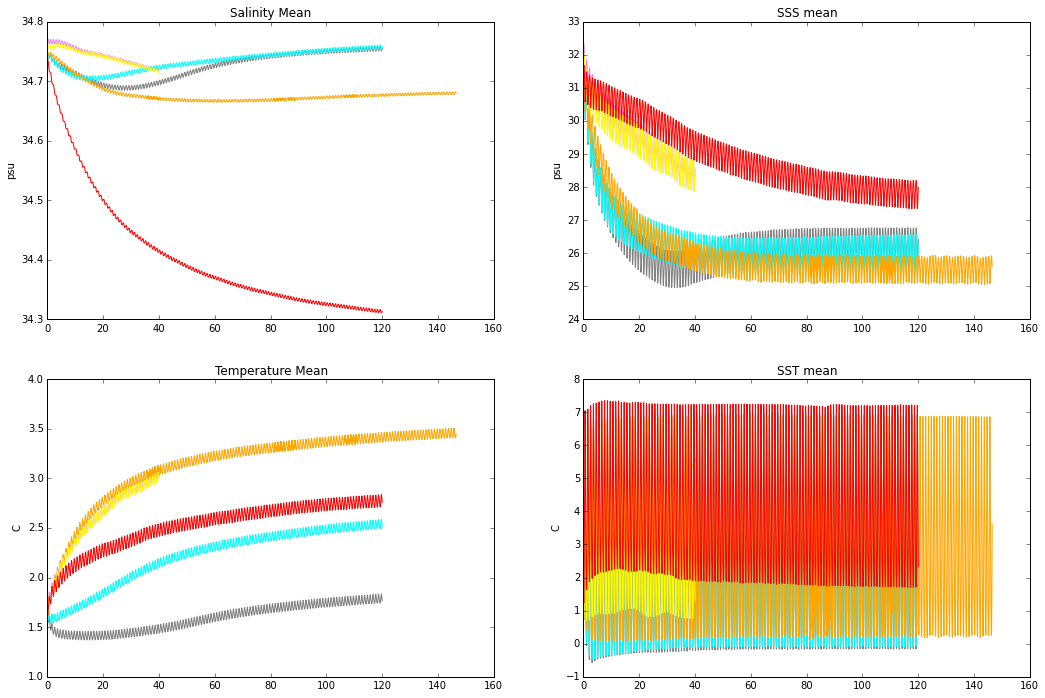

In [188]:
plot_monitor(['salt_mean','sss_mean','theta_mean','sst_mean'])

PHC violet
ERA run with OBS*0.5 grey
ERA run with OBS*0.8 cyan
JRA run first orange
WOA yellow
JRA run with no OBS red


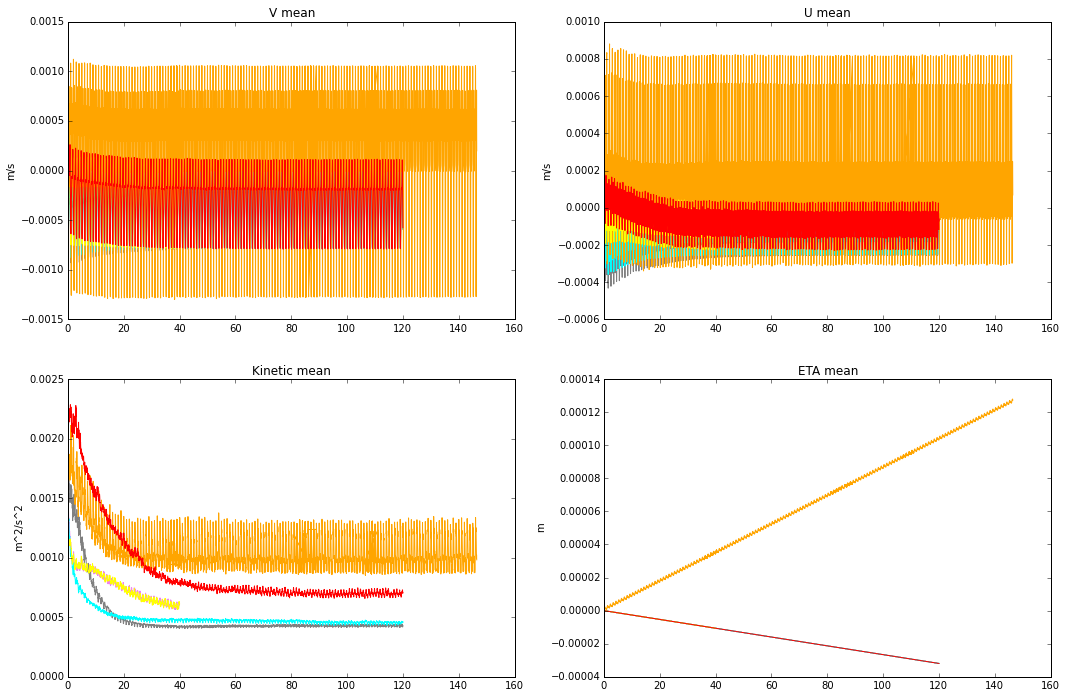

In [189]:
plot_monitor(['vvel_mean','uvel_mean','ke_mean','eta_mean'])

PHC violet
ERA run with OBS*0.5 grey
ERA run with OBS*0.8 cyan
JRA run first orange
WOA yellow
JRA run with no OBS red


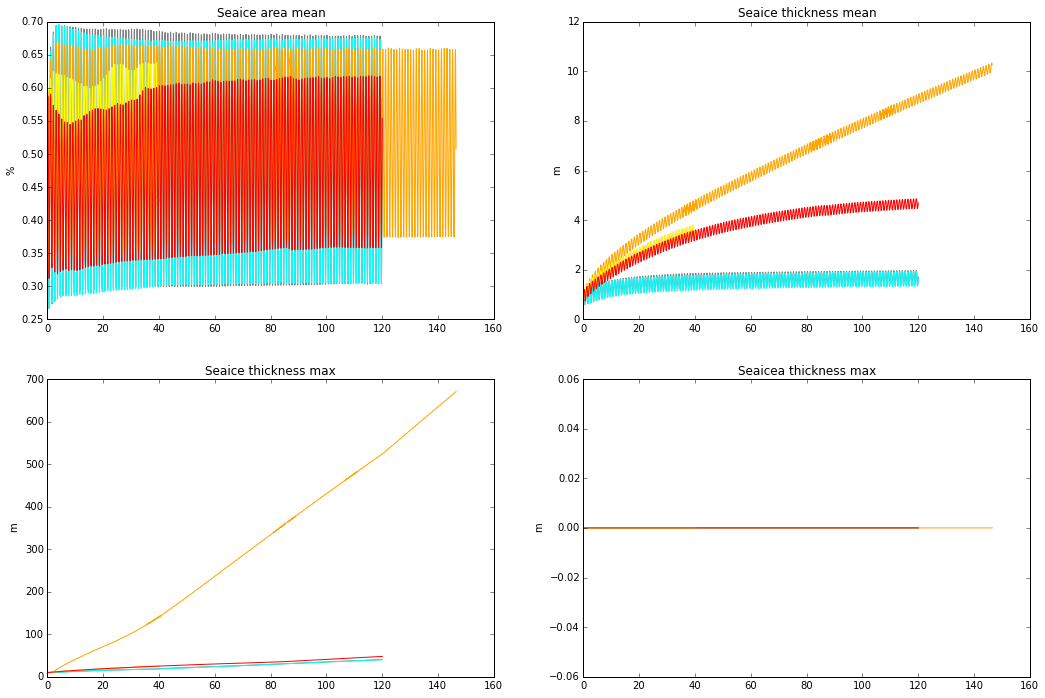

In [190]:
plot_monitor(['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'])

In [114]:
class StateRead:
    
    def __init__(self):
        self.data = {'T' : [], 'V' : [], 'U' : [] , 'S' : [], 'days' : [], 'years' : []}
        self.psi = []
        self.psi_mean = []
        self.psi_max = []
        self.psi_min = []
        self.years = []
        
    def readData(self,path,list_var):
        file2read = netcdf.NetCDFFile(path+'state.nc','r')
        Temp=file2read.variables['Temp']
        self.data['T']=Temp[list_var]*1
        V=file2read.variables['V']
        self.data['V']=V[list_var]*1
        U=file2read.variables['U']
        self.data['U']=U[list_var]*1
        days=file2read.variables['T']
        self.data['days']=days[list_var]*1
        self.years = (self.data['days'] - self.data['days'][0])/(60*60*24*360)        
        
        # Bathy is 1 on land and 0 over sea
        if self.data['T'].shape[3] == 210:
            x="/scratch/general/am8e13/results36km/"
        elif self.data['T'].shape[3] == 420:
            x="/scratch/general/am8e13/results18km/"
        file2read = netcdf.NetCDFFile(x+"grid.nc",'r')
        bathy=file2read.variables['HFacC']
        bathy=bathy[:]*1
        bathy[bathy==0]=-1
        bathy[bathy>0]=0
        bathy[bathy==-1]=1
        self.data['T'][:,bathy==1] = np.nan
        
    def baroCalc(self):
        self.psi = baro_stream(self.data['U'])
        self.psi_mean = np.nanmean(self.psi,axis = 1)
        self.psi_mean = np.nanmean(self.psi_mean,axis = 1)
        self.psi_max = np.nanmax(self.psi,axis=1)
        self.psi_max = np.nanmax(self.psi_max,axis=1)
        self.psi_min = np.nanmin(self.psi,axis=1)
        self.psi_min = np.nanmin(self.psi_min,axis=1)
        
    def topoCalc(self):
        self.topo = Topostrophy(self.data['U'],self.data['V'])
        
    def title(self,title):
        self.title = title
    
    def print_title(self):
        print self.title

In [115]:
data_JRA = StateRead()
data_JRA.readData("/scratch/general/am8e13/results_first/",[0 , 120 , 240 , 360 , 480 , 700])
data_JRA.baroCalc()
data_JRA.topoCalc()
data_JRA.title('JRA run first')

list_var = [0 , 240, 480, 720, 960, 1300]
data_ERA = StateRead()
data_ERA.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_ERA/results/",[0 , 120 , 240 , 360 , 480 , 700])
data_ERA.baroCalc()
data_ERA.topoCalc()
data_ERA.title('ERA run')

data_ERA_tempmod0 = StateRead()
data_ERA_tempmod0.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/",list_var)
data_ERA_tempmod0.baroCalc()
data_ERA_tempmod0.topoCalc()
data_ERA_tempmod0.title('ERA run with Obs*0.5')

data_ERA_tempmod1 = StateRead()
data_ERA_tempmod1.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs1/results/",list_var)
data_ERA_tempmod1.baroCalc()
data_ERA_tempmod1.topoCalc()
data_ERA_tempmod1.title('ERA run with Obs*0.8')

data_ERA_tempmod2 = StateRead()
data_ERA_tempmod2.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs2/results/",list_var)
data_ERA_tempmod2.baroCalc()
data_ERA_tempmod2.topoCalc()
data_ERA_tempmod2.title('ERA run with Obs*0.65')

data_JRA_tempmod0 = StateRead()
data_JRA_tempmod0.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr0/results/",list_var)
data_JRA_tempmod0.baroCalc()
data_JRA_tempmod0.topoCalc()
data_JRA_tempmod0.title('JRA run with Obs*0.5')

data_JRA_tempmod1 = StateRead()
data_JRA_tempmod1.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr1/results/",list_var)
data_JRA_tempmod1.baroCalc()
data_JRA_tempmod1.topoCalc()
data_JRA_tempmod1.title('JRA run with Obs*0.8')

data_JRA_tempmod2 = StateRead()
data_JRA_tempmod2.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr2/results/",list_var)
data_JRA_tempmod2.baroCalc()
data_JRA_tempmod2.topoCalc()
data_JRA_tempmod2.title('JRA run with Obs*0.65')

In [116]:
alldata = {'ERA_tempmod0': data_ERA_tempmod0, 'ERA_tempmod1': data_ERA_tempmod1, 'ERA_tempmod2': data_ERA_tempmod2, \
          'JRA_tempmod0': data_JRA_tempmod0, 'JRA_tempmod1': data_JRA_tempmod1, 'JRA_tempmod2': data_JRA_tempmod2,\
          'ERA_first': data_ERA, 'JRA_first': data_JRA }

In [117]:
def plot_all_run(vimin,vimax,cmap,setbad,unity,origin,x0,x1,y0,y1):
    ord_var = ['ERA_tempmod0','ERA_tempmod1','ERA_tempmod2','ERA_first' ]
    #           'JRA_tempmod0','JRA_tempmod1','JRA_tempmod2','JRA_first']
    fig, axes = plt.subplots(nrows=2, ncols=2)        
    vimin = vimin
    vimax = vimax
    ax_ind=0
    for var in ord_var:    
        axes.flat[ax_ind].set_title(str(alldata[var].title))
        if x0 == x1:
            temp  = alldata[var].data['T'][5,:,x0,y0:y1]
        elif y0 == y1:
            temp  = alldata[var].data['T'][5,:,x0:x1,y0]
        masked_array = np.ma.array(temp, mask=np.isnan(temp))
        cmap=cmap
        cmap.set_bad(setbad,1.)
        ca = axes.flat[ax_ind].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest', \
                    cmap = cmap ,origin= origin, aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        cbar.ax.set_ylabel(unity)
        ax_ind = ax_ind + 1
    fig.subplots_adjust(right=2.4,top=2)

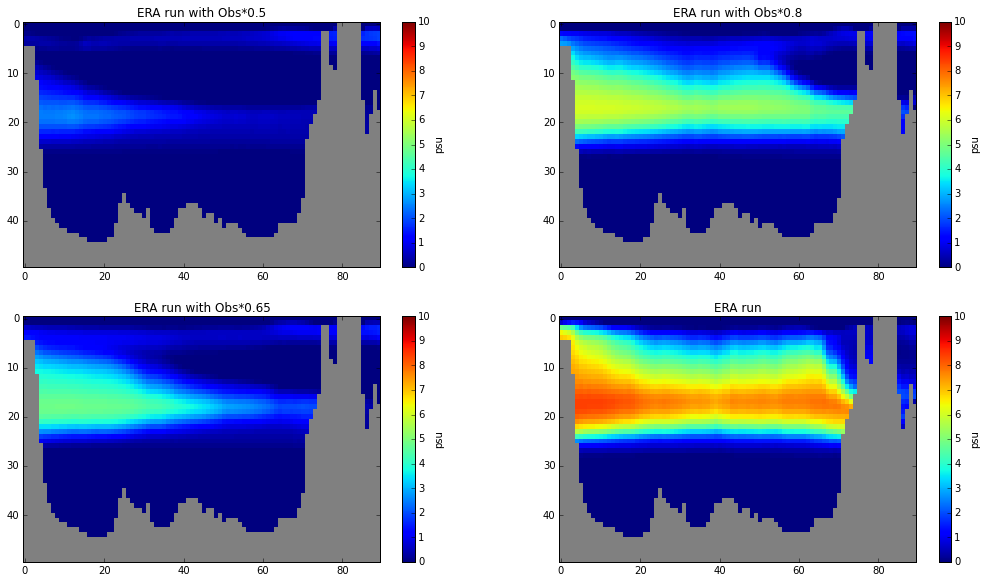

In [118]:
plot_all_run(0,10,matplotlib.cm.jet,'grey','psu','upper',30,120,125,125)

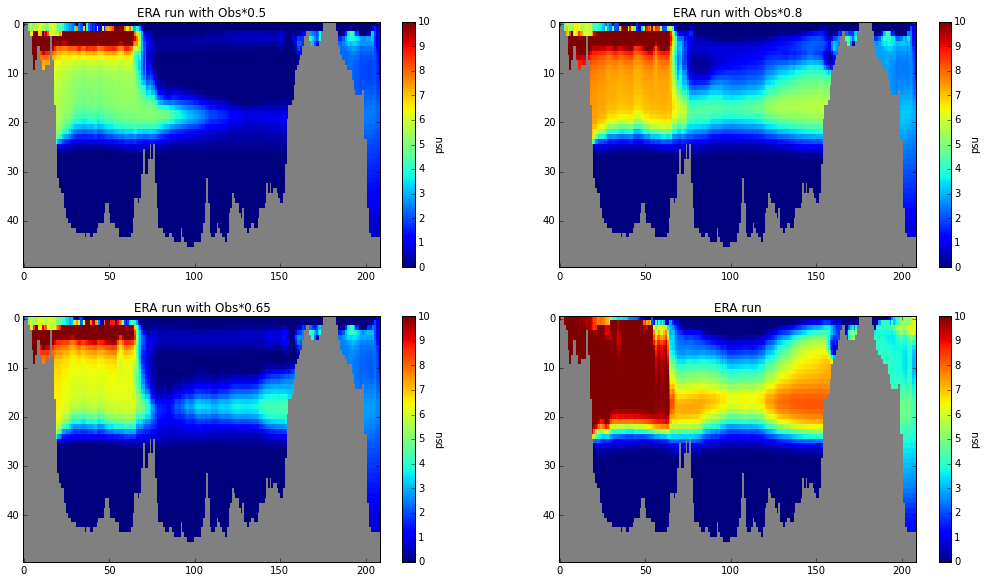

In [119]:
plot_all_run(0,10,matplotlib.cm.jet,'grey','psu','upper',72,72,0,209)

In [120]:
def plot_field_1(data,vimin,vimax,cmap,setbad,unity,origin,times,x0,x1,y0,y1):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    for ax in axes.flat:
        ax.set_title("T = "+str((data.years[i]))+"years")
        if x0 == x1:
            temp  = data.data['T'][:,:,x0,y0:y1]
        elif y0 == y1:
            temp  = data.data['T'][:,:,x0:x1,y0]
        masked_array = np.ma.array(temp[times[i],:,:], mask=np.isnan(temp[times[i],:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest', \
                       cmap = cmap ,origin= origin, aspect='auto')
        cbar = fig.colorbar(ca , ax=ax, )
        cbar.ax.set_ylabel(unity)
        i=i+1
    fig.subplots_adjust(right=2.4,top=2)

ERA run with Obs*0.5


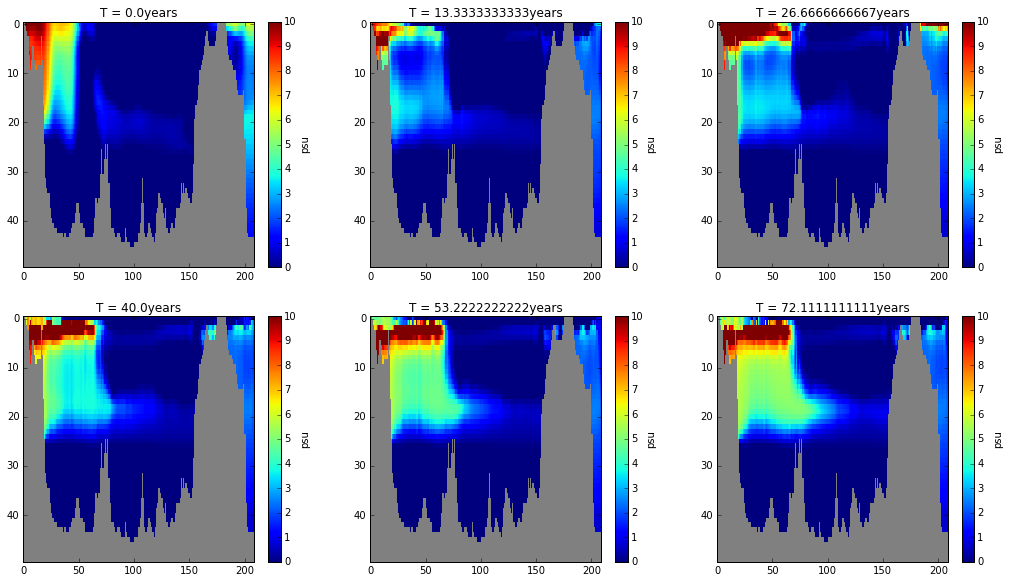

In [121]:
times = range(6)
plot_field_1(data_ERA_tempmod0,0,10,matplotlib.cm.jet,'grey','psu','upper',times,72,72,0,209)
data_ERA_tempmod0.print_title()

ERA run with Obs*0.8


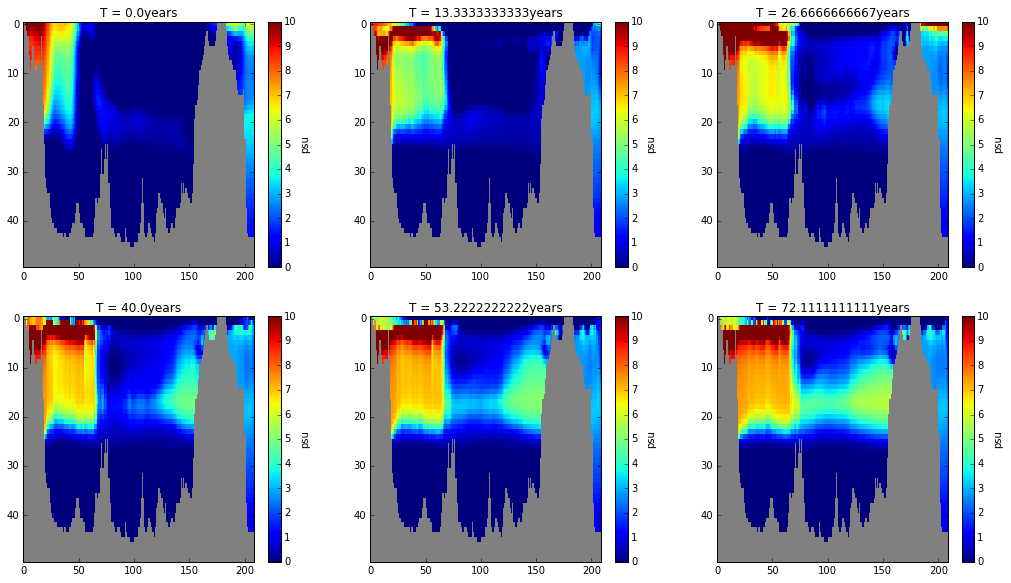

In [122]:
times = range(6)
plot_field_1(data_ERA_tempmod1,0,10,matplotlib.cm.jet,'grey','psu','upper',times,72,72,0,209)
data_ERA_tempmod1.print_title()

ERA run with Obs*0.65


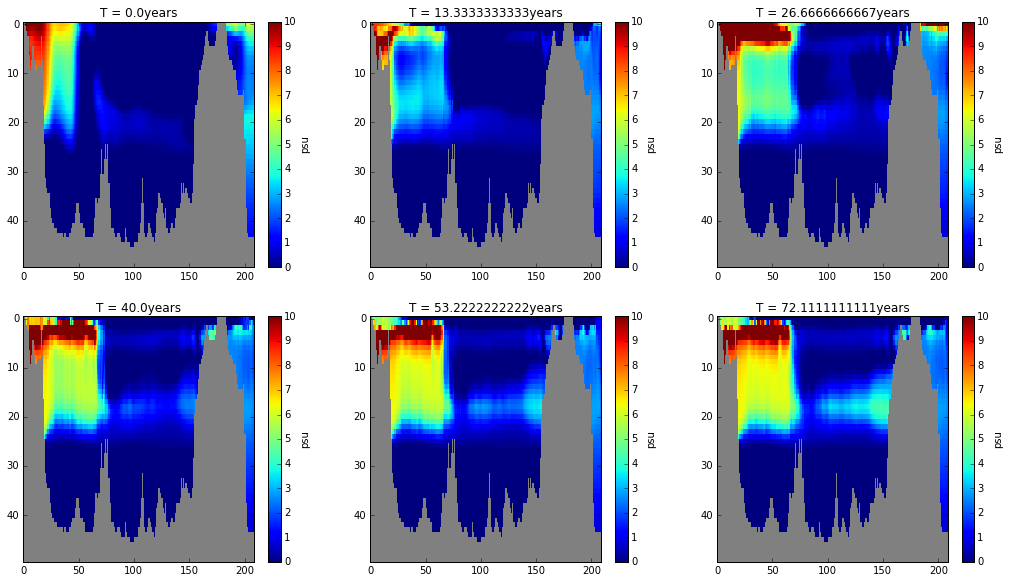

In [123]:
times = range(6)
plot_field_1(data_ERA_tempmod2,0,10,matplotlib.cm.jet,'grey','psu','upper',times,72,72,0,209)
data_ERA_tempmod2.print_title()

JRA run with Obs*0.5


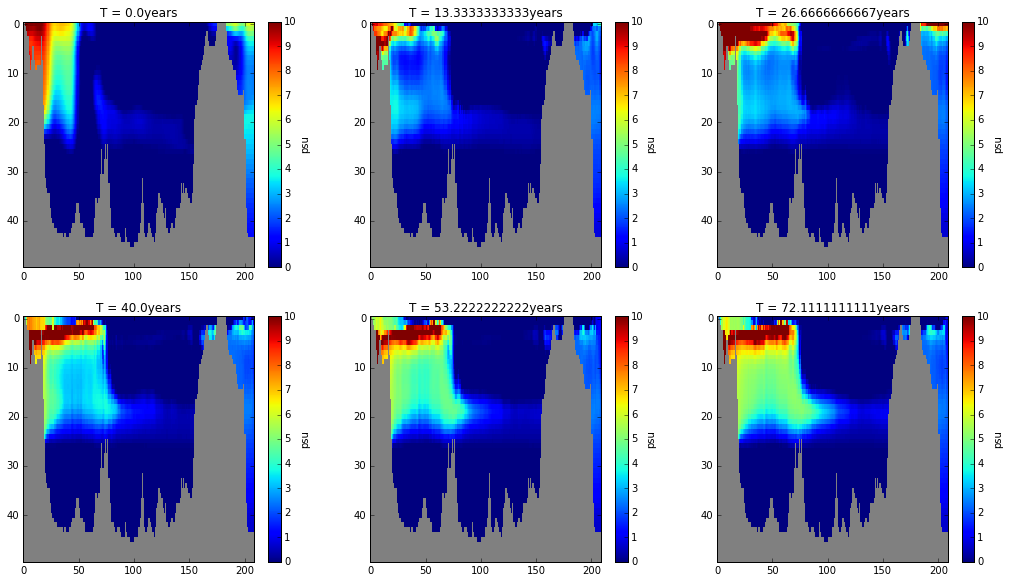

In [124]:
times = range(6)
plot_field_1(data_JRA_tempmod0,0,10,matplotlib.cm.jet,'grey','psu','upper',times,72,72,0,209)
data_JRA_tempmod0.print_title()

JRA run with Obs*0.8


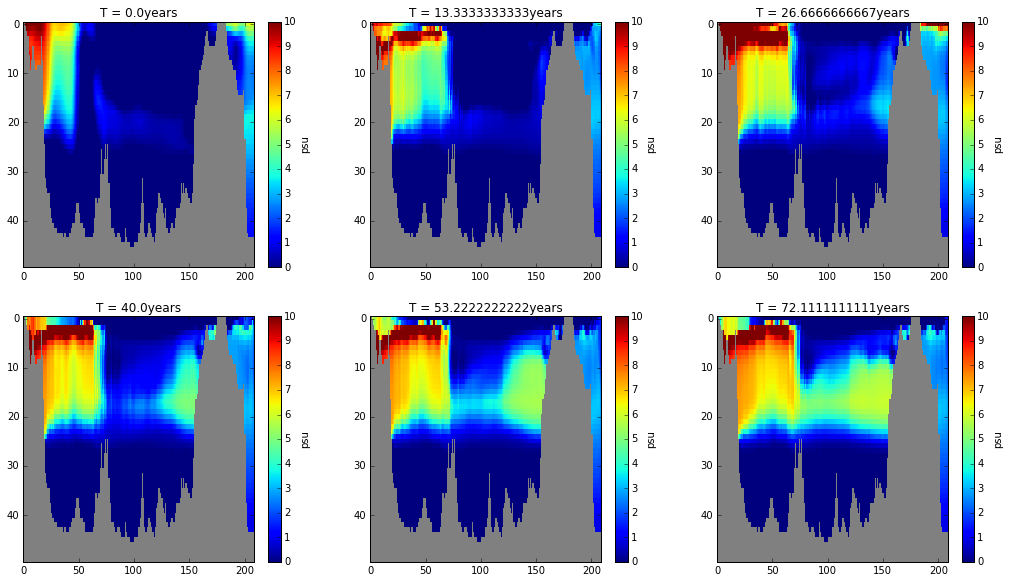

In [125]:
times = range(6)
plot_field_1(data_JRA_tempmod1,0,10,matplotlib.cm.jet,'grey','psu','upper',times,72,72,0,209)
data_JRA_tempmod1.print_title()

JRA run with Obs*0.65


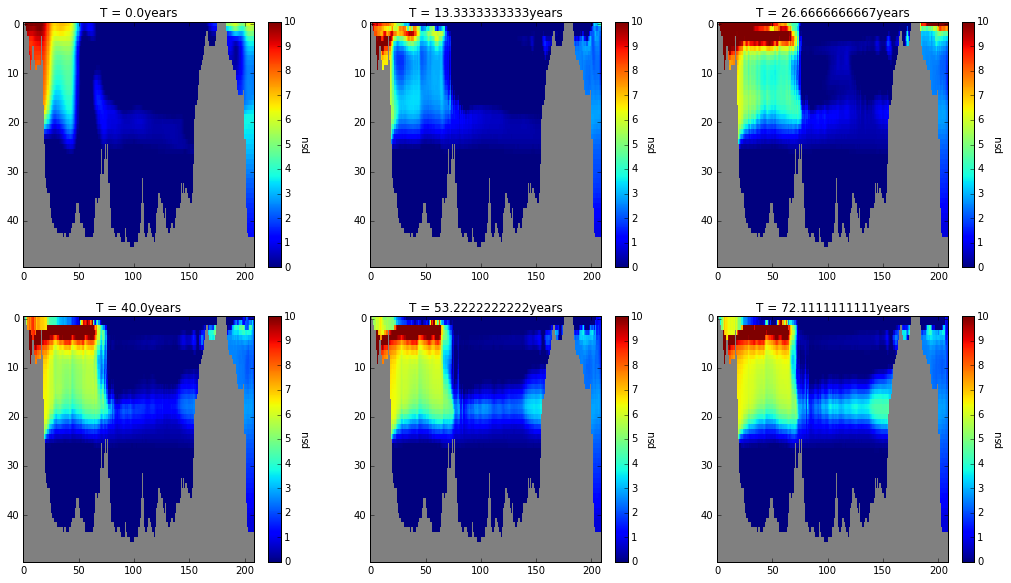

In [126]:
times = range(6)
plot_field_1(data_JRA_tempmod2,0,10,matplotlib.cm.jet,'grey','psu','upper',times,72,72,0,209)
data_JRA_tempmod2.print_title()

ERA run with Obs*0.5


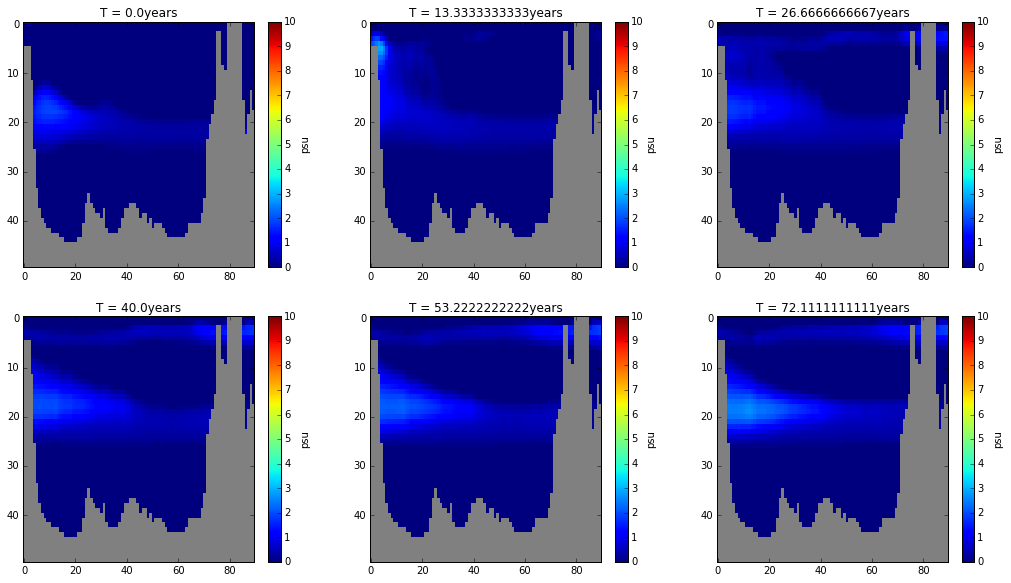

In [127]:
times = range(6)
plot_field_1(data_ERA_tempmod0,0,10,matplotlib.cm.jet,'grey','psu','upper',times,30,120,125,125)
data_ERA_tempmod0.print_title()

ERA run with Obs*0.8


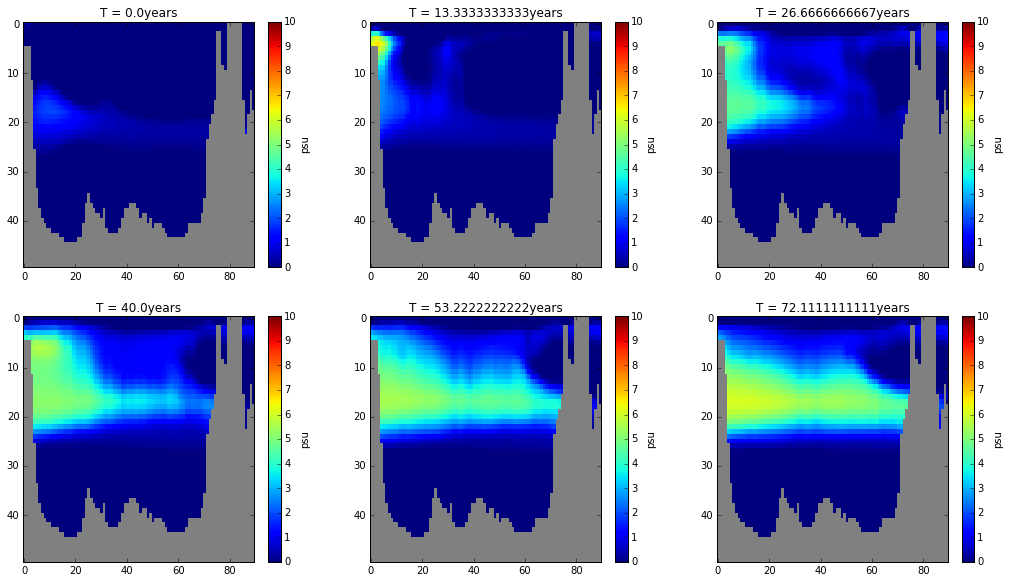

In [128]:
times = range(6)
plot_field_1(data_ERA_tempmod1,0,10,matplotlib.cm.jet,'grey','psu','upper',times,30,120,125,125)
data_ERA_tempmod1.print_title()

ERA run with Obs*0.65


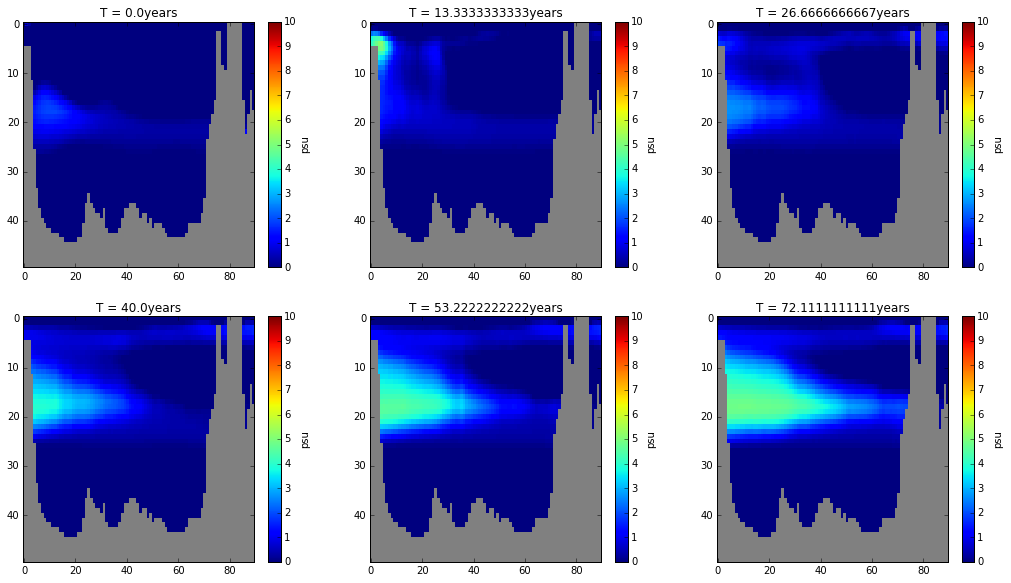

In [129]:
times = range(6)
plot_field_1(data_ERA_tempmod2,0,10,matplotlib.cm.jet,'grey','psu','upper',times,30,120,125,125)
data_ERA_tempmod2.print_title()

JRA run with Obs*0.5


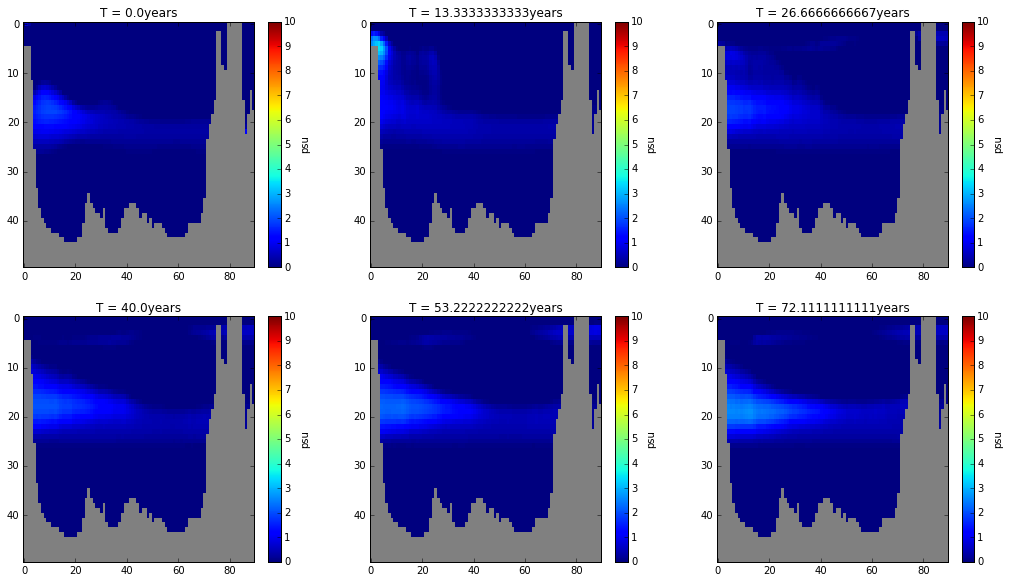

In [130]:
times = range(6)
plot_field_1(data_JRA_tempmod0,0,10,matplotlib.cm.jet,'grey','psu','upper',times,30,120,125,125)
data_JRA_tempmod0.print_title()

####This script is meant to calculate topostrophy. 
Topostrophy is defined in Holloway 2008 as follows:
\begin{equation}
\tau = \hat{\mathrm{u}} \cdot ( \hat{\mathrm{z}}\ \times\ \hat{\mathrm{s}})
\end{equation}
where $\hat{\mathrm{u}}$ is the velocity, $\hat{\mathrm{z}}$ is the vertical unit vector $(0,0,1)$ and $ \hat{\mathrm{s}}=\nabla H$ is the gradient of the Bathymetry.\\
\\
A similar definition is given in Merryfield and Scott 2007 as follows:
\begin{equation}
T(H_j,d_k)=\frac{\sum_i(\hat{\mathrm{u}}_i\cdot \hat{\mathrm{u}}_{n,i})W_i \delta_{jk,i}dV_i}{\sum_i W_i \delta_{jk,i}dV_i}
\end{equation}
where $\hat{\mathrm{u}}_{n} = (\hat{z}\times\hat{s})f/|f|$ with $\hat{\mathrm{z}}$ and $\hat{\mathrm{s}}$ defined above and $f$ the Coriolis parameter, $W_i = |s_i||f_i|$ are the weights, $\delta_{jk,i}$ is a delta function and $dV_i$ is the cell volume. $k$ is the level we are considering whereas $j$ is the depth level for the considered cell. $i$ represent the considered cell, sums for $i$ can be considered to consider various areas.

####Caluclation for the gradient of bathymetry
Gradient of bathymetry is calculated using the following the following formula:
\begin{equation}
(s_x)_n = -\frac{(H_{n+1}-H_{n-1})}{(x_{n+1}-x_{n-1})}
\end{equation}
the same formulat is applied for the $y$ coordinate.

#### Definition of topostrophy-like diagnostic 
Topostrophy is given by the scalar product between velocity and the vector perpendicular to the bathymetric slode. Hence it is maximal when the flow is following the contour direction and minimal when it is following the gradient. Using this idea we can define a diagnostic similar to topostrophy which will be the scalar product of velocity with the gradient of bathymetry. This diagnostic will be positive when the flow is following the bathymetric gradient and will tend to zero when the flow is perpendicular to the bathymetric gradient. The diagnostic is defined as follows:
\begin{equation}
\tau = \hat{\mathrm{u}} \cdot \hat{\mathrm{s}}
\end{equation}

In [131]:
times = range(0,50,1)
def plot_field_gif(field,vimin,vimax,cmap,setbad,unity,title):
    # Salt contentration evolution
    
    #i=3
    vimin = vimin
    vimax = vimax
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for i in range(len(times)):
        
        #ax.set_title("T = "+str(floor((daysStoregga[times[i]]-daysStoregga[0])/t*10)/10) +" years")
        masked_array = np.ma.array(field[i,:,:], mask=np.isnan(field[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        if i == 0:
            cbar = fig.colorbar(ca , ax=ax, )
            cbar.ax.set_ylabel(unity)       
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
    
        
    #fig.subplots_adjust(right=2,top=1.6)
        if i < 10:
            zeros = '000'
        elif i < 100:
            zeros = '00'
        else:
            zeros = '0'
        sout = '/scratch/general/am8e13/gifs/'
        fig.savefig(sout+str(title)+zeros+str(i)+'.png',dpi=300)
        clf
    os.system("convert -delay 1 -dispose Background +page " + str(sout) \
          + "/*.png -loop 0 " + str(sout) + "/animation_"+title+".gif")
    os.system("rm "+str(sout)+"*png")
    sout = '/scratch/general/am8e13/gifs/'
    
#plot_field_gif(tau[:,0,:,:],-1,1,matplotlib.cm.seismic,'grey','','Topo')

In [132]:
def CellVolume(res):
    if res == 36:
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    elif res == 18:
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results18km/grid.nc",'r')
    hfacc = file2read.variables['HFacC']
    hfacc = hfacc[:]*1  
    drf = file2read.variables['drF']
    drf = drf[:]*1
    rA = file2read.variables['rA']
    rA = rA[:]*1
    dydx = np.zeros_like(hfacc)
    for k in range(len(drf)):
        dydx[k,:,:] = drf[k]*rA*hfacc[k,:,:]    
    dydx[hfacc==0]=np.nan
    return dydx
#CellVol = CellVolume(36)

In [285]:
# Face area calculation, we simply defive the Cell Volume for the side length
def FaceArea(res):
    if res == 36:
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    elif res == 18:
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results18km/grid.nc",'r')
    
    CellVol = CellVolume(res)
    
    dyf = file2read.variables['dyF']
    dyf = dyf[:]*1
    dxf = file2read.variables['dxF']
    dxf = dxf[:]*1
    drf = file2read.variables['drF']
    drf = drf[:]*1
    
    faceX = np.zeros_like(CellVol)
    faceY = np.zeros_like(CellVol)
    faceSurf = np.zeros_like(CellVol)
    
    drf = np.tile(drf,(210,192,1))
    drf = np.swapaxes(drf,2,0)
    dyf = np.tile(dyf,(50,1,1))
    dxf = np.tile(dxf,(50,1,1))
    faceSurf = CellVol/drf
    faceX = CellVol/dyf
    faceY = CellVol/dxf    

    return faceX, faceY, faceSurf

faceX, faceY, faceSurf = FaceArea(36)

<matplotlib.colorbar.Colorbar instance at 0x2b8331cc6dd0>

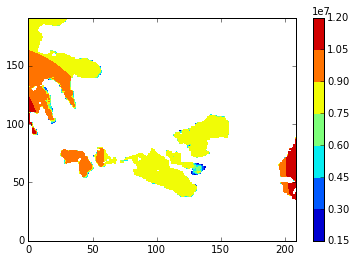

In [294]:
#plt.contourf(faceX[0,:,:])
#plt.colorbar()

In [388]:
def balanceCalc(data):
    if data['ADVr_TH'].shape[3] == 210:
        res = 36
    elif data['ADVr_TH'].shape[3] == 420:
        res = 18
    else:
        print "Dimension Error"
        
    CellVol = CellVolume(res)
    
    file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results"+str(res)+"km/grid.nc",'r')
    RF = file2read.variables['RF']
    RF = RF[:]*1
    drf = file2read.variables['drF']
    drf = drf[:]*1
    hfacc = file2read.variables['HFacC']
    hfacc = hfacc[:]*1
    RAC = file2read.variables['RC']
    hfacc[hfacc==0]=np.nan
    
    nz = CellVol.shape[0]
    ny = CellVol.shape[1]
    nx = CellVol.shape[2]
    nt = data['ADVr_TH'].shape[0]
    swfrac = 0.62*np.exp(RF[0:nz-1]/0.6) + (1.0 - 0.62)*np.exp(RF[0:nz-1]/20.0)
    swfrac1 = 0.62*np.exp(RF[1:nz]/0.6) + (1.0 - 0.62)*np.exp(RF[1:nz]/20.0)
    swdiff = swfrac - swfrac1
    rhoConst = 999.8
    Cp = 4.210
    rhoCp = rhoConst*Cp
    
    Adv_tend = np.zeros_like(data['ADVr_TH'][:,:,:,:])
    Dif_tend = np.zeros_like(data['ADVr_TH'][:,:,:,:])
    Kpp_tend = np.zeros_like(data['ADVr_TH'][:,:,:,:])    
    Qsw_tend = np.zeros_like(data['ADVr_TH'][:,:,:,:])
    Tflx_tend = np.zeros_like(data['ADVr_TH'][:,:,:,:])    
    Heat_tend = np.zeros_like(data['ADVr_TH'][:,:,:,:]) 
    
    for it in range(nt):
        Adv_tend[it,0:49,:,:] = -(data['ADVr_TH'][it,0:nz-1,:,:] - data['ADVr_TH'][it,1:nz,:,:])/CellVol[0:49,:,:]
        Adv_tend[it,:,:,:] += -((data['ADVx_TH'][it,:,:,1:nx+1] - data['ADVx_TH'][it,:,:,0:nx]) / CellVol + \
                                (data['ADVy_TH'][it,:,1:ny+1,:] - data['ADVy_TH'][it,:,0:ny,:]) / CellVol )
        Dif_tend[it,0:49,:,:] = -(data['DFrE_TH'][it,0:nz-1,:,:] - data['DFrE_TH'][it,1:nz,:,:]) /CellVol[0:49,:,:]                                                                                                
        Dif_tend[it,0:49,:,:] = -(data['DFrI_TH'][it,0:nz-1,:,:] - data['DFrI_TH'][it,1:nz,:,:]) /CellVol[0:49,:,:]                                                                                                
        Dif_tend[it,:,:,:] += -((data['DFxE_TH'][it,:,:,1:nx+1] - data['DFxE_TH'][it,:,:,0:nx]) / CellVol + \
                                (data['DFyE_TH'][it,:,1:ny+1,:] - data['DFyE_TH'][it,:,0:ny,:]) / CellVol ) 
        Kpp_tend[it,0:49,:,:] = -(data['KPPg_TH'][it,0:nz-1,:,:] - data['KPPg_TH'][it,1:nz,:,:])/CellVol[0:49,:,:]
                                                                                                
        for iz in range(nz-1):
            Qsw_tend[it,iz,:,:] = data['oceQsw'][it,0,:,:] / rhoCp /((drf[iz])*hfacc[iz,:,:])*swdiff[iz]                                                            
            Tflx_tend[it, iz,:,:] = (data['TFLUX'][it,0,:,:] - data['oceQsw'][it,0,:,:])/(rhoCp*drf[0]*hfacc[iz,:,:])
    
    #for it in range(nt):                                                                
    #    for iz in range(nz-1):
    #        if iz == 0:
    Tflx_tend_surf = np.zeros_like(Tflx_tend)
    Tflx_tend_surf[:,0,:,:] = Tflx_tend[:,0,:,:]
    Heat_tend = Adv_tend + Dif_tend + Kpp_tend + Qsw_tend + Tflx_tend_surf
    
    #            Heat_tend[it,iz,:,:] = Adv_tend[it,iz,:,:] + Dif_tend[it,iz,:,:] + Kpp_tend[it,iz,:,:]  \
    #                                    + Qsw_tend[it,iz,:,:] + Tflx_tend[it,iz,:,:]
    #        else:
    #            Heat_tend[it,iz,:,:] = Adv_tend[it,iz,:,:] + Dif_tend[it,iz,:,:] + Kpp_tend[it,iz,:,:]  \
    #                                    + Qsw_tend[it,iz,:,:]
    return Adv_tend, Dif_tend, Kpp_tend, Qsw_tend, Tflx_tend, Heat_tend

In [345]:
class FieldForBalance():
    def __init__(self):
        self.data = {'ADVr_TH' : [] , 'ADVx_TH' : [] , 'ADVy_TH' : [] , 'TOTTTEND' : [] , \
                    'DFrE_TH' : [] , 'DFxE_TH' : [] , 'DFyE_TH' : [] , 'DFrI_TH ' : [] , \
                    'KPPg_TH' : [] , 'TFLUX' : [] , 'oceQsw' : [] , 'WTHMASS' : [] , 'oceQnet' : [] }
        
    def ReadData(self,path,list_var):
        file2read = netcdf.NetCDFFile(path+'heatbal1.nc','r')
        ADVr_TH = file2read.variables['ADVr_TH']
        self.data['ADVr_TH'] = ADVr_TH[list_var]*1
        ADVx_TH = file2read.variables['ADVx_TH']
        self.data['ADVx_TH'] = ADVx_TH[list_var]*1
        ADVy_TH = file2read.variables['ADVy_TH']
        self.data['ADVy_TH'] = ADVy_TH[list_var]*1
        TOTTTEND = file2read.variables['TOTTTEND']
        self.data['TOTTTEND'] = TOTTTEND[list_var]*1/86400.0
        DFrE_TH = file2read.variables['DFrE_TH']
        self.data['DFrE_TH'] = DFrE_TH[list_var]*1
        DFxE_TH = file2read.variables['DFxE_TH']
        self.data['DFxE_TH'] = DFxE_TH[list_var]*1
        DFyE_TH = file2read.variables['DFyE_TH']
        self.data['DFyE_TH'] = DFyE_TH[list_var]*1
        DFrI_TH = file2read.variables['DFrI_TH']
        self.data['DFrI_TH'] = DFrI_TH[list_var]*1
        KPPg_TH = file2read.variables['KPPg_TH']
        self.data['KPPg_TH'] = KPPg_TH[list_var]*1
        days = file2read.variables['T']
        self.data['days']=days[list_var]*1
        self.years = (self.data['days'] - self.data['days'][0])/(60*60*24*360)  
       
        file2read = netcdf.NetCDFFile(path+'heatbal2.nc','r')
        TFLUX = file2read.variables['TFLUX']
        self.data['TFLUX'] = TFLUX[list_var]*1        
        oceQsw = file2read.variables['oceQsw']
        self.data['oceQsw'] = oceQsw[list_var]*1
        WTHMASS = file2read.variables['WTHMASS']
        self.data['WTHMASS'] = WTHMASS[list_var]*1
        oceQnet = file2read.variables['oceQnet']
        self.data['oceQnet'] = oceQsw[list_var]*1             
        
    def title(self,title):
        self.title = title
    
    def print_title(self):
        print self.title
        
    def fluxCalc(self):
        Adv_tend, Dif_tend, Kpp_tend, Qsw_tend, Tflx_tend, Heat_tend = balanceCalc(self.data)
        
        self.heatbal = {'Adv_tend' : Adv_tend, 'Dif_tend' : Dif_tend, 'Kpp_tend' : Kpp_tend, \
                        'Qsw_tend' : Qsw_tend, 'Tflx_tend' : Tflx_tend, 'Heat_tend' : Heat_tend, \
                        'TOTTTEND' : self.data['TOTTTEND'] }
        
        self.heatbal_vol = {'Adv_tend' : np.array(Adv_tend), 'Dif_tend' : np.array(Dif_tend), \
                            'Kpp_tend' : np.array(Kpp_tend), 'Qsw_tend' : np.array(Qsw_tend), \
                            'Tflx_tend' : np.array(Tflx_tend), 'Heat_tend' : np.array(Heat_tend), \
                           'TOTTTEND' : np.array(self.data['TOTTTEND'])}
        
        if self.heatbal['Adv_tend'].shape[3] == 210:
            res = 36
        elif self.heatbal['Adv_tend'].shape[3] == 420:
            res = 18
        else:
            print "Dimension Error"
        
        CellVol = CellVolume(res)
        var_list = ['Adv_tend', 'Dif_tend', 'Kpp_tend', 'Qsw_tend', 'Tflx_tend', 'Heat_tend','TOTTTEND']
        
        for var in var_list:
            if var == 'TOTTTEND':
                for t in range(self.heatbal['Adv_tend'].shape[0]):
                    self.heatbal_vol[var][t,:,:,:] = self.data[var][t,:,:,:]*CellVol
            else:
                for t in range(self.heatbal['Adv_tend'].shape[0]):
                    self.heatbal_vol[var][t,:,:,:] = self.heatbal[var][t,:,:,:]*CellVol

    
    def fluxAverage(self):
        self.heat_ave = {'Adv_tend' : [], 'Dif_tend' : [], 'Kpp_tend' : [], \
                        'Qsw_tend' : [], 'Tflx_tend' : [], 'Heat_tend' : [], 'TOTTTEND': [] }
        
        self.heat_ave_vol = {'Adv_tend' : [], 'Dif_tend' : [], 'Kpp_tend' : [], \
                        'Qsw_tend' : [], 'Tflx_tend' : [], 'Heat_tend' : [], 'TOTTTEND': [] }
        
        for var in self.heat_ave:
            if var == 'TOTTTEND':
                self.heat_ave[var] = np.nansum(np.nansum(np.nansum(self.data[var],axis=3),axis=2),axis=1)
                self.heat_ave_vol[var] = np.nansum(np.nansum(np.nansum(self.heatbal_vol[var],axis=3),axis=2),axis=1)
            else:
                self.heat_ave[var] = np.nansum(np.nansum(np.nansum(self.heatbal[var],axis=3),axis=2),axis=1)
                self.heat_ave_vol[var] = np.nansum(np.nansum(np.nansum(self.heatbal_vol[var],axis=3),axis=2),axis=1)
        

In [394]:
list_var = np.array(range(24))*60
ERA_run = FieldForBalance()
ERA_run.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',list_var)
ERA_run.fluxCalc()
ERA_run.fluxAverage() 

In [398]:
ERA_run1 = FieldForBalance()
ERA_run1.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs1/results/',list_var)
ERA_run1.fluxCalc()
ERA_run1.fluxAverage()

In [400]:
ERA_run2 = FieldForBalance()
ERA_run2.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs2/results/',list_var)
ERA_run2.fluxCalc()
ERA_run2.fluxAverage()

In [401]:
JRA_run = FieldForBalance()
JRA_run.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr0/results/',list_var)
JRA_run.fluxCalc()
JRA_run.fluxAverage()

In [402]:
JRA_run1 = FieldForBalance()
JRA_run1.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr1/results/',list_var)
JRA_run1.fluxCalc()
JRA_run1.fluxAverage()

In [ ]:
JRA_run2 = FieldForBalance()
JRA_run2.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_JRA_tempcorr2/results/',list_var)
JRA_run2.fluxCalc()
JRA_run2.fluxAverage()

In [ ]:
variables = { 
            'Adv_tend' : ['Adv_tend','b','blue'], \
             'Dif_tend' : ['Dif_tend','g','green'], \
            'Kpp_tend' : ['Kpp_tend','k','black'], \
              'Qsw_tend' : ['Qsw_tend','m','magenta'], \
            'Heat_tend' : ['Heat_tend','r','red'], \
            'Tflx_tend' : ['Tflx_tend','c','cyan'],
            'TOTTTEND' : ['TOTTTEND','y','yellow'],
            }
run_list = {'ERA_run' : [ERA_run,'s--'] , 'ERA_run1' : [ERA_run1,'^--'] , 'ERA_run2' : [ERA_run2,'d--'], \
           'JRA_run' : [JRA_run,'-'] , 'JRA_run1' : [JRA_run1,'o-'] , 'JRA_run2' : [JRA_run2,'*-'],}

def plot_heatbal(variables):
    fig, axes = plt.subplots(1,1)
    ax_ind = 0
    for var in variables:  
        for mon in run_list:
            axes.plot(run_list[mon][0].years,abs(run_list[mon][0].heat_ave_vol[var]),variables[var][1]+run_list[mon][1])
        axes.set_yscale('log')
        #axes.set_title(titles[var])
        #ax_ind += 1
        print var+' '+variables[var][2]
    fig.subplots_adjust(right=2.4,top=2.4)
plot_heatbal(variables)

In [ ]:
variables = { 
            'Adv_tend' : ['Adv_tend'], \
             'Dif_tend' : ['Dif_tend'], \
            'TOTTTEND' : ['TOTTTEND'], \
              'Qsw_tend' : ['Qsw_tend'], \
            'Heat_tend' : ['Heat_tend'], \
            'Tflx_tend' : ['Tflx_tend'],
            }
run_list = {'ERA_run' : [ERA_run,'b-'] , 'ERA_run1' : [ERA_run1,'r-'] , 'ERA_run2' : [ERA_run2,'g-'], \
           'JRA_run' : [JRA_run,'b--'] , 'JRA_run1' : [JRA_run1,'r--'] , 'JRA_run2' : [JRA_run2,'g--'] }

def plot_heatbalsingle(variables):
    fig, axes = plt.subplots(2,3)
    ax_ind = 0
    for var in variables:  
        for mon in run_list:
            axes.flat[ax_ind].plot(run_list[mon][0].years[3:],run_list[mon][0].heat_ave_vol[var][3:],run_list[mon][1])
            
        axes.flat[ax_ind].set_title(var)
        ax_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.4)
plot_heatbalsingle(variables)
print 'Strait line ERA / dashed line JRA'
print 'Blue OBCS*0.5'
print 'Green OBCS*0.65'
print 'Red OBCS*0.8'

In [ ]:
surf = np.nansum(np.nansum(ERA_run.heatbal['Heat_tend'][3:,0,:,:]*faceSurf[0,:,:],axis=2),axis=1)
lat1 = np.nansum(np.nansum(ERA_run.heatbal['Heat_tend'][3:,:,191,:]*faceX[:,191,:],axis=2),axis=1)
lat2 = np.nansum(np.nansum(ERA_run.heatbal['Heat_tend'][3:,:,:,0]*faceY[:,:,0],axis=2),axis=1)
lat3 = np.nansum(np.nansum(ERA_run.heatbal['Heat_tend'][3:,:,:,209]*faceY[:,:,209],axis=2),axis=1)

surf1 = np.nansum(np.nansum(ERA_run1.heatbal['Heat_tend'][3:,0,:,:]*faceSurf[0,:,:],axis=2),axis=1)
lat11 = np.nansum(np.nansum(ERA_run1.heatbal['Heat_tend'][3:,:,191,:]*faceX[:,191,:],axis=2),axis=1)
lat21 = np.nansum(np.nansum(ERA_run1.heatbal['Heat_tend'][3:,:,:,0]*faceY[:,:,0],axis=2),axis=1)
lat31 = np.nansum(np.nansum(ERA_run1.heatbal['Heat_tend'][3:,:,:,209]*faceY[:,:,209],axis=2),axis=1)

surf2 = np.nansum(np.nansum(ERA_run2.heatbal['Heat_tend'][3:,0,:,:]*faceSurf[0,:,:],axis=2),axis=1)
lat12 = np.nansum(np.nansum(ERA_run2.heatbal['Heat_tend'][3:,:,191,:]*faceX[:,191,:],axis=2),axis=1)
lat22 = np.nansum(np.nansum(ERA_run2.heatbal['Heat_tend'][3:,:,:,0]*faceY[:,:,0],axis=2),axis=1)
lat32 = np.nansum(np.nansum(ERA_run2.heatbal['Heat_tend'][3:,:,:,209]*faceY[:,:,209],axis=2),axis=1)

In [ ]:
fig,[ax1,ax2] = plt.subplots(1,2)

ax1.plot(lat1,'r')
ax1.plot(lat2,'g')
ax1.plot(lat3,'c')

ax1.plot(lat11,'r--')
ax1.plot(lat21,'g--')
ax1.plot(lat31,'c--')

ax1.plot(lat12,'r+-')
ax1.plot(lat22,'g+-')
ax1.plot(lat32,'c+-')

ax2.plot(surf,'b')
ax2.plot(surf1,'b--')
ax2.plot(surf2,'b+-')

fig.subplots_adjust(right=2.2,top=1.5)
print 'Strait line OBCS*0.5/ ++line OBCS*0.65 /dashed line OBCS*0.65' 
print 'Cyan = East / Green = West / Red = North'
print 'Blue = Surface'

In [ ]:
# Pointvise
variables = { 
#            'Adv_tend' : ['Adv_tend','b','blue'], \
#             'Dif_tend' : ['Dif_tend','g','green'], \
#            'Kpp_tend' : ['Kpp_tend','k','black'], \
#              'Qsw_tend' : ['Qsw_tend','m','magenta'], \
            'Heat_tend' : ['Heat_tend','r','red'], \
#            'Tflx_tend' : ['Tflx_tend','c','cyan'],
            'TOTTTEND' : ['TOTTTEND','y','yellow'],
            }
run_list = {
            'ERA_run' : [ERA_run,'s--'] , 'ERA_run1' : [ERA_run1,'^--'] , 'ERA_run2' : [ERA_run2,'d--'], \
           #'JRA_run' : [JRA_run,'-'] , 'JRA_run1' : [JRA_run1,'o-'] , 'JRA_run2' : [JRA_run2,'*-'],
            }


def plot_heatbal_pointwise(variables,iz,iy,ix):
    fig, axes = plt.subplots(1,1)
    ax_ind = 0
    for var in variables:  
        for mon in run_list:
            axes.plot(run_list[mon][0].years,abs(run_list[mon][0].heatbal[var][:,iz,iy,ix]),variables[var][1]+run_list[mon][1])
        axes.set_yscale('log')
        #axes.set_title(titles[var])
        #ax_ind += 1
        print var+' '+variables[var][2]
    fig.subplots_adjust(right=2.4,top=2.4)
plot_heatbal_pointwise(variables,2,120,125)